 # Machine Learning
 Academic Year 2021/22, P. Zanuttigh, U. Michieli, F. Barbato, D. Shenaj, G. Rizzoli

The notebook contains some simple tasks to be performed about classification and regression. 


# 1) Classification of Music genre

### Dataset description

A music genre is a conventional category that identifies pieces of music as belonging to a shared tradition or set of conventions. It is to be distinguished from musical form and musical style. The features extracted from these songs can help the machine to assing them to the two genres. 

This dataset is a subset of the dataset provided [here](https://www.kaggle.com/insiyeah/musicfeatures), containing only the data regarding the classical and metal genres.

### We consider 3 features for the classification

1) **tempo**, the speed at which a passage of music is played, i.e., the beats per minute of the musical piece<br>
2) **chroma_stft**, [mean chromagram activation on Short-Time Fourier Transform](https://librosa.org/doc/0.7.0/generated/librosa.feature.chroma_stft.html)<br>
3) **spectral_centroid**, Indicates where the "center of mass" of the spectrum is located, i.e., it is the weighted average of the frequency transform<br>


We first import all the packages that are needed.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

# Perceptron
Firstly we will implement the perceptron algorithm and use it to learn a halfspace.

In [4]:
np.random.seed(1337)

Load the dataset and then split in training set and test set (the training set is typically larger, we can use a 75% tranining 25% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [5]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) #columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # for the perceptron classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


We are going to classify class "1" (metal) vs class "-1" (classical)

In [6]:
# Divide in training and test: make sure that your training set
# contains at least 10 elements from class 1 and at least 10 elements
# from class -1! If it does not, modify the code so to apply more random
# permutations (or the same permutation multiple times) until this happens.


x_train, x_test, y_train, y_test = sl.model_selection.train_test_split(X,Y,test_size = 0.25 )

#m_training needs to be the number of samples in the training set
m_training = len(x_train) 

#m_test needs to be the number of samples in the test set
m_test = len(x_test) 

#X_training = instances for training set
X_training =  x_train 
#Y_training = labels for the training set
Y_training = y_train 

#X_test = instances for test set
X_test = x_test 
#Y_test = labels for the test set
Y_test = y_test 

print(Y_training) #to make sure that Y_training contains both 1 and -1
print(m_test)

print("Shape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print("Number of metal instances in test:", np.sum(Y_test==1))

print("Shape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

[ 1 -1  1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1  1  1  1 -1  1 -1  1 -1  1
  1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1 -1
  1  1 -1 -1 -1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1
 -1  1 -1 -1 -1  1 -1  1  1 -1 -1  1  1 -1  1  1  1 -1 -1  1 -1 -1  1 -1
  1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1
  1 -1  1 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1  1 -1  1  1  1  1 -1 -1 -1
 -1  1 -1 -1  1 -1]
50
Shape of training set: (150, 3)
Shape of test set: (50, 3)

Number of classical instances in test: 28
Number of metal instances in test: 22
Shape of training set: (150, 3)
Shape of test set: (50, 3)


We add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. This can be done with the function $hstack$ in $numpy$.

In [7]:
# Add a 1 to each sample (homogeneous coordinates)
X_training = np.hstack((np.ones((m_training,1)),X_training))
X_test = np.hstack((np.ones((m_test,1)),X_test))

print("Training set in homogeneous coordinates:")
print(X_training[:10])

Training set in homogeneous coordinates:
[[1.00000000e+00 1.17453835e+02 5.01569949e-01 2.83687885e+03]
 [1.00000000e+00 9.57031250e+01 2.67155855e-01 9.83686387e+02]
 [1.00000000e+00 1.43554688e+02 4.96368499e-01 2.79255875e+03]
 [1.00000000e+00 1.17453835e+02 4.56040406e-01 2.26914139e+03]
 [1.00000000e+00 1.17453835e+02 4.21571092e-01 1.98812037e+03]
 [1.00000000e+00 2.34907670e+02 2.70478239e-01 1.21629376e+03]
 [1.00000000e+00 1.61499023e+02 2.45645579e-01 1.27860109e+03]
 [1.00000000e+00 1.23046875e+02 4.40829184e-01 2.95527209e+03]
 [1.00000000e+00 1.43554688e+02 2.67353394e-01 1.11822751e+03]
 [1.00000000e+00 8.61328125e+01 2.27545203e-01 1.80070784e+03]]


Now we complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, our implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of misclassified samples for the best model

In [8]:
def perceptron_update(current_w, x, y):
    
    new_w=current_w+float(y)*x
    return new_w

def perceptron(X, Y, max_num_iterations):
    
    #init the algorith with w=0, use a best_w variable to keep track of the best solution
    curr_w = np.zeros(X.shape[1])
    best_w = np.zeros(X.shape[1])
    num_samples = Y.shape[0]
    best_error = 100000
    
    index_misclassified = 0 #will be ovewritten
   
    
    
    #main loop continue until all samples correctly classified or max # iterations reached
    num_iter = 1
    
    while ((index_misclassified != -1) and (num_iter < max_num_iterations)):
        num_misclassified = 0 #will be ovewritten
        permutation=np.random.permutation(num_samples)
        X=X[permutation]
        Y=Y[permutation]
        
        for i in range(num_samples):
            
            if i in range(num_samples):
                if (np.inner(curr_w,X[i,:])*Y[i]<=0):
                    index_misclassified = i
                    break
                    
        curr_w=perceptron_update(curr_w,X[index_misclassified],Y[index_misclassified])

        #update  error count, keep track of best solution
        for i in range (num_samples):
            if (np.inner(curr_w,X[i,:])*Y[i]<=0):
                num_misclassified+=1  
                
        if num_misclassified == 0:
            index_misclassified = -1
            
        temp_error=num_misclassified/num_samples
        
        if temp_error<best_error:
            best_error=temp_error
            best_w=curr_w
    
        num_iter += 1
        
    
    return best_w, best_error

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [9]:
#now run the perceptron for 100 iterations
w_found, error = perceptron(X_training,Y_training, 100)
print("Training Error of perpceptron (100 iterations): " + str(error))

Training Error of perpceptron (100 iterations): 0.19333333333333333


use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [14]:
#now use the w_found to make predictions on test dataset
#now run the perceptron for 100 iterations
w_found_2, num_errors = perceptron(X_test,Y_test, 100)




true_loss_estimate = num_errors/m_test  # error rate on the test set
#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perpceptron (100 iterations): " + str(true_loss_estimate))

Test Error of perpceptron (100 iterations): 0.0024


In [17]:
#now run the perceptron for 3000 iterations here!

w_found, error = perceptron(X_training,Y_training, 4000)



print("Training Error of perpceptron (4000 iterations): " + str(error))


w_found_2, num_errors = perceptron(X_test,Y_test, 4000)
true_loss_estimate = num_errors/m_test  # error rate on the test set



print("Test Error of perpceptron (4000 iterations): " + str(true_loss_estimate))

Training Error of perpceptron (4000 iterations): 0.12
Test Error of perpceptron (4000 iterations): 0.0008


# Logistic Regression
Now we use logistic regression, exploiting the implementation in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [18]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) # columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # for the perceprton classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


As for the previous part,we divide the data into training and test (75%-25%) and add a 1 as first component to each sample.

In [19]:
#Divide in training and test
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.

x_train, x_test, y_train, y_test = sl.model_selection.train_test_split(X,Y,test_size = 0.25 )

#m_training needs to be the number of samples in the training set
m_training = len(x_train) 

#m_test needs to be the number of samples in the test set
m_test = len(x_test) 

#X_training = instances for training set
X_training =  x_train 
#Y_training = labels for the training set
Y_training = y_train 

#X_test = instances for test set
X_test = x_test 
#Y_test = labels for the test set
Y_test = y_test 

print("Number of samples in the test set:", m_test)
print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print("Number of metal instances in test:", np.sum(Y_test==1))

print("\nShape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

Number of samples in the test set: 50

Number of classical instances in test: 31
Number of metal instances in test: 19

Shape of training set: (150, 3)
Shape of test set: (50, 3)


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples misclassified in the training set and in the test set.

In [20]:
#part on logistic regression for 2 classes
logreg = linear_model.LogisticRegression(C=1e5) #a large C disables regularization

#learn from training set


logreg.fit(x_train,y_train)


#predict on training set
logreg.predict(x_train)



score_train = logreg.score(x_train,y_train)


#print the error rate = fraction of misclassified samples
error_rate_training = 1-score_train



print("Error rate on training set: "+str(error_rate_training))

#predict on test set



#print the error rate = fraction of misclassified samples
score_test = logreg.score(x_test,y_test)
error_rate_test = 1-score_test



print("Error rate on test set: " + str(error_rate_test))

Error rate on training set: 0.0
Error rate on test set: 0.020000000000000018


Now we pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

In [21]:
# to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['tempo', 'chroma_stft', 'spectral_centroid']
index_feature1 = 0 # Select the best 2 features according to your experiments
index_feature2 = 2 # Select the best 2 features according to your experiments
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

X_reduced = X[:,features]


x_train, x_test, y_train, y_test = sl.model_selection.train_test_split(X_reduced,Y,test_size = 0.25 )

X_training = x_train
Y_training = y_train

X_test = x_test
Y_test = y_test



Now learn a model using the training data and measure the performances.

In [22]:
# learning from training data

logreg.fit(x_train, y_train)
score = logreg.score(x_test,y_test)


#print the error rate = fraction of misclassified samples
error_rate_test = 1-score



print("Error rate on test set: " + str(error_rate_test))

Error rate on test set: 0.06000000000000005


The code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

<ipython-input-23-680b231a4713>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


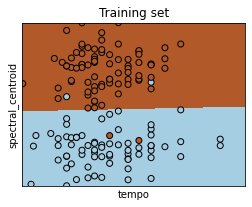

<ipython-input-23-680b231a4713>:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


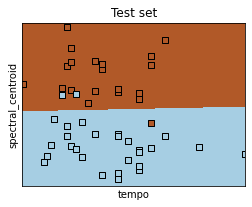

In [23]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook, 
# it could be necessary to make some fixes to adapt to your implementation

h = 0.82  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()